In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pareto

In [2]:
filepath = "/home/tbergh98/Documenti/Università/Communication Network Design/Homework/chiamata_zoom.csv"
table = pd.read_csv(filepath, sep=',')
print(table.shape)

(5201, 7)


In [3]:
table.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,2,0.005884,134.224.67.86,192.168.1.44,UDP,188,8801 > 53820 Len=146
1,3,0.005915,134.224.67.86,192.168.1.44,UDP,187,8801 > 53820 Len=145
2,7,0.014561,134.224.67.86,192.168.1.44,UDP,1221,8801 > 57091 Len=1179
3,10,0.015322,134.224.67.86,192.168.1.44,UDP,1221,8801 > 57091 Len=1179
4,11,0.025059,134.224.67.86,192.168.1.44,UDP,1221,8801 > 57091 Len=1179


In [4]:
table.columns

Index(['No.', 'Time', 'Source', 'Destination', 'Protocol', 'Length', 'Info'], dtype='object')

<Figure size 432x288 with 0 Axes>

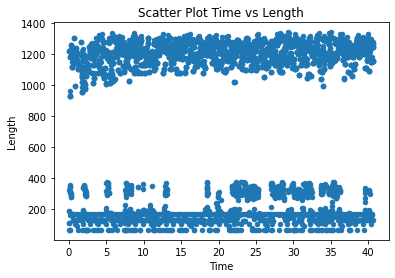

In [5]:
# Plot of Time vs Length of the arriving packets
plt.figure()
table.plot.scatter(x='Time', y='Length')
plt.title('Scatter Plot Time vs Length')
plt.show()

# Interarrival Times

The mean of the Inter Arrival Times Vector is: 0.007821395945192306 [s]
The Standard Deviation of the Inter Arrival Times Vector is: 0.012114812223019836


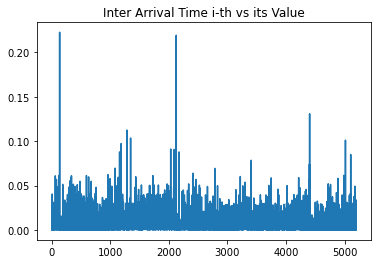

In [6]:
# Plot of Interarrival Times

# Every sample is obtained as a[i] - a[i-1]:
inter_arrival_times = np.diff(table['Time'])

# Statistics
mean_A_i = np.mean(inter_arrival_times)
std_A_i = np.std(inter_arrival_times)
print(f'The mean of the Inter Arrival Times Vector is: {mean_A_i} [s]')
print(f'The Standard Deviation of the Inter Arrival Times Vector is: {std_A_i}')

# Plotting the Interarrival Times
plt.figure()
plt.title('Inter Arrival Time i-th vs its Value')
plt.plot(inter_arrival_times)

The mean of the Batch Inter Arrival Times Vector is: 0.007821395945192306 [s]
The Standard Deviation of the Batch Inter Arrival Times Vector is: 0.012114812223019836
127.8544146092853


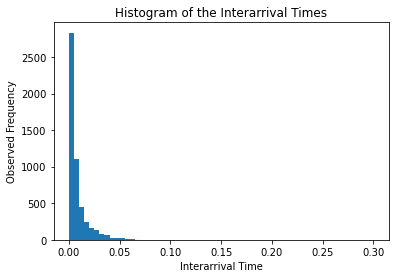

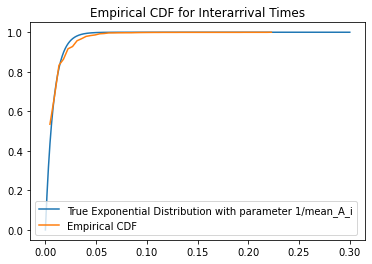

In [7]:
# Plot histogram distribution and CFD of Interarrival Times, ignoring the outliers with
# inter_arrival_time >>.

#ignore last outliers (A_i over 2.25 seconds)
sup_limit = 2.25
non_zero_indeces = np.nonzero(inter_arrival_times < sup_limit)
inter_arrival_times = inter_arrival_times[non_zero_indeces]

# Statistics
mean_A_i = np.mean(inter_arrival_times)
std_A_i = np.std(inter_arrival_times)
print(f'The mean of the Batch Inter Arrival Times Vector is: {mean_A_i} [s]')
print(f'The Standard Deviation of the Batch Inter Arrival Times Vector is: {std_A_i}')

# Not normalized histogram
plt.figure()
plt.title("Histogram of the Interarrival Times")
plt.xlabel('Interarrival Time')
plt.ylabel('Observed Frequency')
plt.hist(inter_arrival_times, bins=60, range = (0,0.3))

# CFD comparison with proposed exponential model
plt.figure()
plt.title("Empirical CDF for Interarrival Times")

# Plot Exponential model
x = np.linspace(0.000001, 0.3, num=1000)
mu = 1/mean_A_i #exponential parameter
print(mu)
y = 1 - np.exp(- mu * x)
plt.plot(x,y, label="True Exponential Distribution with parameter 1/mean_A_i")

count, bins_count = np.histogram(inter_arrival_times, bins=50)
pdf = count / np.sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label="Empirical CDF")
plt.legend()

/home/tbergh98/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 432x288 with 0 Axes>

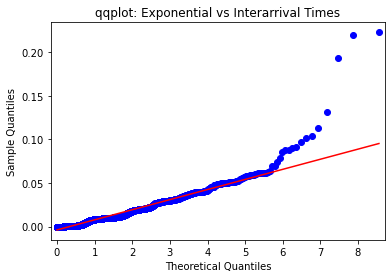

In [8]:
# qqplot showing that the exp. model iwork really well except when the cumulative
# distribution approaches 1.
import statsmodels.api as sm
plt.figure()
sm.qqplot(inter_arrival_times, stats.expon, line='r')
plt.title('qqplot: Exponential vs Interarrival Times')
plt.show()

# Batch Size

The batch sizes can take the following values: [1]
and they occur respectively [5200] times.
Any other analysis is useless since the only possible outcome is B_i=1


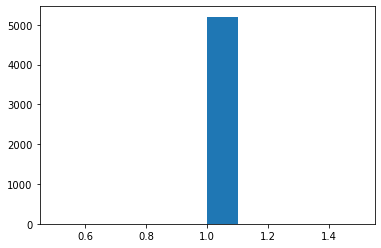

In [9]:
# let's consider again the vector inter_arrival_times. We count the cardinalities
# of 0s sequences.

threshold = 0
cardinalities = []
counter = 1

for t in inter_arrival_times:
    if t < threshold:
        counter = counter + 1
    else:
        cardinalities.append(counter)
        counter = 1
        
plt.hist(cardinalities)

unique_values, counts = np.unique(cardinalities, return_counts= True)
print(f'The batch sizes can take the following values: {unique_values}')
print(f'and they occur respectively {counts} times.')
print('Any other analysis is useless since the only possible outcome is B_i=1')

## Considerations on Batch Size
We are dealing with a communication 1-to-1 in a private network, which reduces drastically the traffick w.r.t. what we have seen in the professor example where the packets collection took place with more than 20 spectators.

# Workload
Since the Batch size are constantly equal to 1, we have that the workload a the arrival time $\{T_i\}$ is equal to the size of the corresponding packet, which is an extremely fortunate case which make very easy the computation.

In [10]:
# Statistics
mean_workload = np.mean(table['Length'])
std_workload = np.std(table['Length'])
print(f'The mean of the pck size vector is: {mean_workload} [Byte]')
print(f'The Standard Deviation of the pck size Vector is: {std_workload}')

The mean of the pck size vector is: 894.3247452412998 [Byte]
The Standard Deviation of the pck size Vector is: 465.0353561047498


(array([114.,  48.,  94., 299., 322.,  96.,  35.,   4.,   4.,  29., 129.,
        179., 122.,  89.,  30.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   5.,   5.,   6.,   7.,
         26.,  20.,  46., 123., 137., 177., 245., 327., 386., 412., 406.,
        372., 374., 358., 149.,  26.]),
 array([  66.        ,   87.21666667,  108.43333333,  129.65      ,
         150.86666667,  172.08333333,  193.3       ,  214.51666667,
         235.73333333,  256.95      ,  278.16666667,  299.38333333,
         320.6       ,  341.81666667,  363.03333333,  384.25      ,
         405.46666667,  426.68333333,  447.9       ,  469.11666667,
         490.33333333,  511.55      ,  532.76666667,  553.98333333,
         575.2       ,  596.41666667,  617.63333333,  638.85      ,
         660.06666667,  681.28333333,  702.5       ,  723.71666667,
         744.93333333,  766.15      ,  787.366

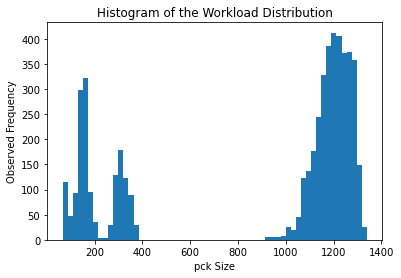

In [11]:
plt.figure()
plt.title("Histogram of the Workload Distribution")
plt.xlabel('pck Size')
plt.ylabel('Observed Frequency')
plt.hist(table['Length'], bins=60)

In [12]:
# select only the range which goes from 900B to 1400 B in order to extract meaningful
# parameters.

table_3 = table.loc[table['Length'] > 900]

print(table_3.shape)

#new statistics
mean_workload = np.mean(table_3['Length'])
std_workload = np.std(table_3['Length'])
print(f'The mean of the pck size vector is: {mean_workload} [Byte]')
print(f'The Standard Deviation of the pck size Vector is: {std_workload}')

(3607, 7)
The mean of the pck size vector is: 1199.2628222899916 [Byte]
The Standard Deviation of the pck size Vector is: 68.92785177917901


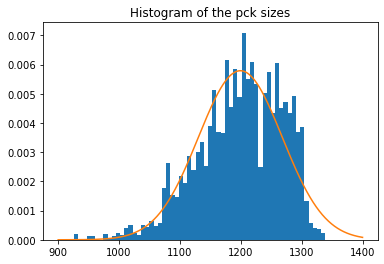

In [13]:
# New Histogram
plt.figure()
plt.title("Histogram of the pck sizes")
plt.hist(table_3['Length'], bins=60, density=True)

x = np.linspace(900,1400, num=1000)
plt.plot(x, stats.norm.pdf(x, mean_workload, std_workload))
plt.show()

In [14]:
# Smallest size packages distribution
table_1 = table.loc[table['Length'] < 250]

mean_1 = np.mean(table_1['Length'])
std_1 = np.std(table_1['Length'])
print(f'The mean of the pck size vector is: {mean_1} [Byte]')
print(f'The Standard Deviation of the pck size Vector is: {std_1}')

# Middle Size packages
table_2 = table.loc[(table['Length'] < 400) & (table['Length'] > 250)]

mean_2 = np.mean(table_2['Length'])
std_2 = np.std(table_2['Length'])
print(f'The mean of the pck size vector is: {mean_2} [Byte]')
print(f'The Standard Deviation of the pck size Vector is: {std_2}')

The mean of the pck size vector is: 140.10728346456693 [Byte]
The Standard Deviation of the pck size Vector is: 35.84070874918726
The mean of the pck size vector is: 317.1159169550173 [Byte]
The Standard Deviation of the pck size Vector is: 26.05561106091757


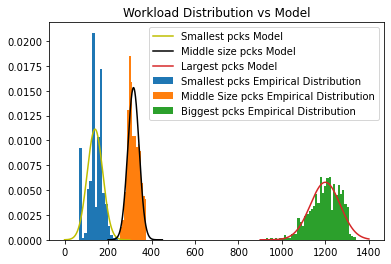

In [15]:
plt.figure()
plt.title('Workload Distribution vs Model')

# Plot empirical normalizes histograms
plt.hist(table_1['Length'], bins=15, density=True, label='Smallest pcks Empirical Distribution')

plt.hist(table_2['Length'], bins=15, density=True, label='Middle Size pcks Empirical Distribution')

plt.hist(table_3['Length'], bins=40, density=True, label='Biggest pcks Empirical Distribution')

# Plot 3 separate gaussian models
x = np.linspace(0,300, num=1000)
plt.plot(x, stats.norm.pdf(x, mean_1, std_1), 'y', label='Smallest pcks Model')

x = np.linspace(200,450, num=1000)
plt.plot(x, stats.norm.pdf(x, mean_2, std_2), 'k', label='Middle size pcks Model')

x = np.linspace(900,1400, num=1000)
plt.plot(x, stats.norm.pdf(x, mean_workload, std_workload), label='Largest pcks Model')

# plot
plt.legend()
plt.show()

/home/tbergh98/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


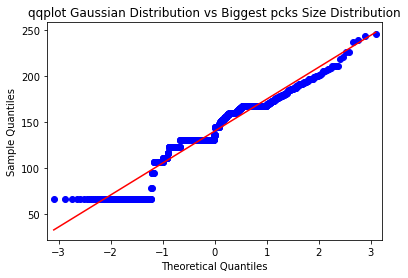

In [16]:
# qqplot regarding the last gaussian and its histogram.
# there is a deviation from the distribution visible in the right tail of the
# plot above, corresponding to the left part of the plot below.
sm.qqplot(table_1['Length'], line='r')
plt.title('qqplot Gaussian Distribution vs Biggest pcks Size Distribution')
plt.show()